## **Notebook #10**
## Natural Language Processing - Word Embedding using OpinRank.
**Professor:** Fernando J. Von Zuben <br>
**Aluno(a):** Caio Francisco Garcia de Lima **RA** 195210


### Based on [material 1](https://kavita-ganesan.com/gensim-word2vec-tutorial-starter-code/#.Xwa18pWSncc), [material 2](https://github.com/kavgan/nlp-in-practice/blob/master/word2vec/Word2Vec.ipynb) and [material 3](https://www.kaggle.com/pierremegret/gensim-word2vec-tutorial).

In [1]:
# Imports needed and logging
import numpy as np
from sklearn.decomposition import PCA
import pandas as pd
from matplotlib import pyplot as plt
import sklearn
from sklearn.manifold import TSNE
import seaborn as sns
import gzip
import gensim 
import logging

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Realizando o carregamento do arquivo de reviews, diretamente do google drive.

In [4]:
# data_file="reviews_data.txt.gz" # Please, define the working directory appropriately
# Importing data from my drive
data_file = "/content/drive/MyDrive/Colab Notebooks/PC2_code_data/reviews_data.txt.gz"

with gzip.open (data_file, 'rb') as f:
    for i,line in enumerate (f):
        print(line)
        break

b"Oct 12 2009 \tNice trendy hotel location not too bad.\tI stayed in this hotel for one night. As this is a fairly new place some of the taxi drivers did not know where it was and/or did not want to drive there. Once I have eventually arrived at the hotel, I was very pleasantly surprised with the decor of the lobby/ground floor area. It was very stylish and modern. I found the reception's staff geeting me with 'Aloha' a bit out of place, but I guess they are briefed to say that to keep up the coroporate image.As I have a Starwood Preferred Guest member, I was given a small gift upon-check in. It was only a couple of fridge magnets in a gift box, but nevertheless a nice gesture.My room was nice and roomy, there are tea and coffee facilities in each room and you get two complimentary bottles of water plus some toiletries by 'bliss'.The location is not great. It is at the last metro stop and you then need to take a taxi, but if you are not planning on going to see the historic sites in Be

Realizndo a leitura do arquivo de reviews e realizando um pré-processamento

In [5]:
def read_input(input_file):
    """This method reads the input file which is in gzip format"""
    
    logging.info("reading file {0}...this may take a while".format(input_file))
    
    with gzip.open (input_file, 'rb') as f:
        for i, line in enumerate (f): 

            if (i%10000==0):
                logging.info ("read {0} reviews".format (i))
            # Do some pre-processing and return a list of words for each review text
            yield gensim.utils.simple_preprocess (line)

# Read the tokenized reviews into a list
# Each review item becomes a serries of words
# So this becomes a list of lists
documents = list (read_input (data_file))
logging.info ("Done reading data file")

2022-07-11 16:12:22,802 : INFO : reading file /content/drive/MyDrive/Colab Notebooks/PC2_code_data/reviews_data.txt.gz...this may take a while
2022-07-11 16:12:22,810 : INFO : read 0 reviews
2022-07-11 16:12:25,920 : INFO : read 10000 reviews
2022-07-11 16:12:28,130 : INFO : read 20000 reviews
2022-07-11 16:12:30,743 : INFO : read 30000 reviews
2022-07-11 16:12:33,554 : INFO : read 40000 reviews
2022-07-11 16:12:36,198 : INFO : read 50000 reviews
2022-07-11 16:12:38,751 : INFO : read 60000 reviews
2022-07-11 16:12:40,918 : INFO : read 70000 reviews
2022-07-11 16:12:42,881 : INFO : read 80000 reviews
2022-07-11 16:12:44,982 : INFO : read 90000 reviews
2022-07-11 16:12:46,985 : INFO : read 100000 reviews
2022-07-11 16:12:48,975 : INFO : read 110000 reviews
2022-07-11 16:12:51,011 : INFO : read 120000 reviews
2022-07-11 16:12:53,055 : INFO : read 130000 reviews
2022-07-11 16:12:55,889 : INFO : read 140000 reviews
2022-07-11 16:12:57,915 : INFO : read 150000 reviews
2022-07-11 16:12:59,970

Utilizamos o Word2Vec, uma proposta de mapeamento linear, essencialmente é uma rede neural MLP com apenas uma camada intermediária e função de ativação identidade para todos os neurônios.

>  gensim.models.Word2Vec(documents, size=150, window=10, min_count=2, workers=10)

Nesta linha realizamos a criação de um modelo com as palavras recuperadas do documento para o espaço condensado, são definidos alguns parâmetros são eles:

- ***size*** → Quantidade de dimensões das incorporações.
- ***window*** → Distância máxima entre a palavra atual e a palavra predita.
- ***min_count*** → Qual o mínimo de frequência para a palavra ser considerada.
- ***workers*** → Quantas threads serão utilizadas no treinamento do modelo.

> model.train(documents,total_examples=len(documents),epochs=10)

Nesta linha realizamos o treinamento dos vetores de palavras. Igualmente alguns parâmetros são definidos:

- ***total_examples*** → Quantidade total de palavras.
- ***epochs*** → Quantidade total épocas de treinamento.

In [6]:
model = gensim.models.Word2Vec(documents, size=150, window=10, min_count=2, workers=10)
model.train(documents,total_examples=len(documents),epochs=10)

2022-07-11 16:13:35,127 : WARNING : consider setting layer size to a multiple of 4 for greater performance
2022-07-11 16:13:35,136 : INFO : collecting all words and their counts
2022-07-11 16:13:35,138 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2022-07-11 16:13:36,152 : INFO : PROGRESS: at sentence #10000, processed 1655714 words, keeping 25777 word types
2022-07-11 16:13:36,957 : INFO : PROGRESS: at sentence #20000, processed 3317863 words, keeping 35016 word types
2022-07-11 16:13:38,125 : INFO : PROGRESS: at sentence #30000, processed 5264072 words, keeping 47518 word types
2022-07-11 16:13:39,083 : INFO : PROGRESS: at sentence #40000, processed 7081746 words, keeping 56675 word types
2022-07-11 16:13:39,548 : INFO : PROGRESS: at sentence #50000, processed 9089491 words, keeping 63744 word types
2022-07-11 16:13:40,007 : INFO : PROGRESS: at sentence #60000, processed 11013726 words, keeping 76786 word types
2022-07-11 16:13:40,384 : INFO : PROGRESS: a

(303494763, 415193580)

Agora estamos amostrando palavras do espaço condesado e buscando as palavras com maior similiaridade, podemos observar que o espaço está adequado pois palavras como "*filthy*" e "*unclean*" estão próximas de "*dirty*", e estas são sinônimos.

In [7]:
w1 = "dirty"
model.wv.most_similar (positive=w1)

2022-07-11 16:36:54,681 : INFO : precomputing L2-norms of word weight vectors


[('filthy', 0.8621253371238708),
 ('unclean', 0.7770541906356812),
 ('stained', 0.7759248614311218),
 ('dusty', 0.7568181753158569),
 ('grubby', 0.756672203540802),
 ('smelly', 0.7452901601791382),
 ('dingy', 0.7396881580352783),
 ('soiled', 0.729428231716156),
 ('disgusting', 0.728236198425293),
 ('grimy', 0.7216927409172058)]

Novamente estamos amostrando as palavras próximas de polite, porém somente o top 6. 

<small>PS: Idêntico as duas células seguintes variando somente a palavra</small>

In [8]:
# look up top 6 words similar to 'polite'
w1 = ["polite"]
model.wv.most_similar (positive=w1,topn=6)

[('courteous', 0.9188609719276428),
 ('friendly', 0.834815502166748),
 ('professional', 0.793298065662384),
 ('attentive', 0.7832810282707214),
 ('cordial', 0.7737674713134766),
 ('curteous', 0.7695496082305908)]

In [9]:
# look up top 6 words similar to 'france'
w1 = ["france"]
model.wv.most_similar (positive=w1,topn=6)

[('canada', 0.6828470230102539),
 ('england', 0.6522960662841797),
 ('germany', 0.646045446395874),
 ('spain', 0.6411082744598389),
 ('mexico', 0.6304101943969727),
 ('hawaii', 0.6290764808654785)]

In [10]:
# look up top 6 words similar to 'shocked'
w1 = ["shocked"]
model.wv.most_similar (positive=w1,topn=6)

[('amazed', 0.8098540902137756),
 ('horrified', 0.79916912317276),
 ('stunned', 0.786310613155365),
 ('astonished', 0.7768738269805908),
 ('dismayed', 0.7543357610702515),
 ('appalled', 0.7421756982803345)]

Basicamente estamos realizando operações aritméticas no nosso espaço denso, 
nesse caso:

<p align="center">
$$ bed + sheet + pillow - couch= [duvet , blanket, mattress, quilt, pillowcase, matress, foam, pillowcases, pillows, sheets] $$
</p>

Ou seja, queremos os resultados da operação:
$$cama + lençol + travesseiro - sofá$$

O resultado é um array com as 10 palavras mais próximas, sendo a mais próxima de todas "Edredon", o que faz sentido se análisado a operação.

In [11]:
# get everything related to stuff on the bed
w1 = ["bed",'sheet','pillow']
w2 = ['couch']
model.wv.most_similar (positive=w1,negative=w2,topn=10)

[('duvet', 0.7168169617652893),
 ('blanket', 0.7075358033180237),
 ('mattress', 0.7007699608802795),
 ('quilt', 0.6872503161430359),
 ('pillowcase', 0.6703475713729858),
 ('matress', 0.6651657223701477),
 ('foam', 0.6485746502876282),
 ('pillowcases', 0.6416103839874268),
 ('pillows', 0.640792727470398),
 ('sheets', 0.6300870776176453)]

Obtendo a similaridade entre duas palavras, podemos observar que "dirty" e "smelly" tem similaridade de, aproximadamente, 74%. 

In [12]:
# similarity between two different words
model.wv.similarity(w1="dirty",w2="smelly")

0.74529016

Verificando qual palavra do array ['bed', 'pillow', 'duvet', 'shower'], não faz parte do conjunto, nesse caso é 'shower'.


In [13]:
# Which one is the odd one out in this list?
model.wv.doesnt_match(['bed','pillow','duvet','shower'])

/usr/local/lib/python3.7/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'shower'

É criada uma função para exibir uma região de uma palavra alvo do nosso espaço denso em um gráfico 2D, a palavra em <font color='red'>vermelho</font> é a palavra alvo, ou seja a que foi usada para guiar a excursão do espaço, em <font color='blue'>azul</font> as palavras mais próximas, ou parecidas, e em <font color='green'>verde</font> outras palavras que devem estar presentes naquele espaço. Como parâmetros recebemos:
- *model* → O modelo ou seja, nosso espaço denso. <br>
- *word* → A palavra alvo.<br>
- *list_names* → As palavras relacionadas.

In [14]:
def tsnescatterplot(model, word, list_names):
    """ Plot in seaborn the results from the t-SNE dimensionality reduction algorithm of the vectors of a query word,
    its list of most similar words, and a list of words.
    """
    arrays = np.empty((0, 150), dtype='f')
    word_labels = [word]
    color_list  = ['red']

    # adds the vector of the query word
    arrays = np.append(arrays, model.wv.__getitem__([word]), axis=0)
    
    # gets list of most similar words
    close_words = model.wv.most_similar([word])
    
    # adds the vector for each of the closest words to the array
    for wrd_score in close_words:
        wrd_vector = model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append('blue')
        arrays = np.append(arrays, wrd_vector, axis=0)
    
    # adds the vector for each of the words from list_names to the array
    for wrd in list_names:
        wrd_vector = model.wv.__getitem__([wrd])
        word_labels.append(wrd)
        color_list.append('green')
        arrays = np.append(arrays, wrd_vector, axis=0)
        
    # Reduces the dimensionality from 300 to 50 dimensions with PCA
    reduc = PCA(n_components=18).fit_transform(arrays)
    
    # Finds t-SNE coordinates for 2 dimensions
    np.set_printoptions(suppress=True)
    
    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(reduc)
    
    # Sets everything up to plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list})
    
    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)
    
    # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df['color']
                                 }
                    )
    
    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ' + df["words"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df['color'][line],
                 weight='normal'
                ).set_size(15)

    
    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)
            
    plt.title('t-SNE visualization for {}'.format(word.title()))

Definida a função exibimos o gráfico do espaço denso, no primeiro caso a palavra alvo é <font color='red'>'bed'</font> e as palavras auxiliares são:  <font color='green'>'dog', 'bird', 'grass', 'milk', 'soccer', 'bread', 'thorn', 'bear'</font>

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


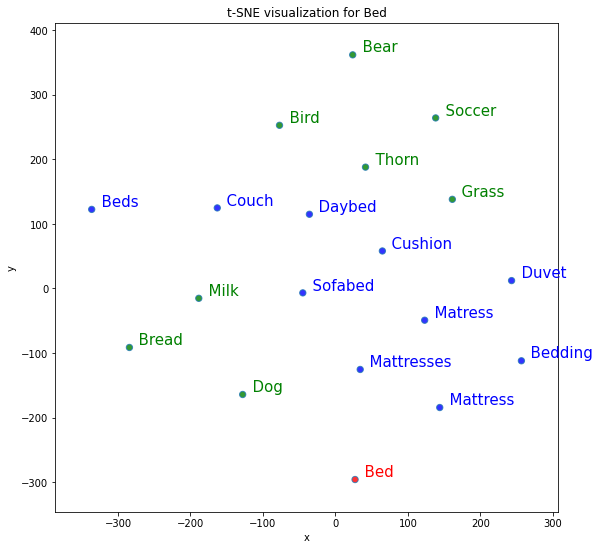

In [15]:
import numpy as np
from sklearn.decomposition import PCA
import pandas as pd
from matplotlib import pyplot as plt

tsnescatterplot(model, 'bed', ['dog', 'bird', 'grass', 'milk', 'soccer', 'bread', 'thorn', 'bear'])

Neste caso a palavra alvo é <font color='red'>'matress'</font> e as palavras auxiliares são a segunda metade do top 20 palavras mais similares de <font color='red'>'matress'</font>, são elas: <font color='green'>'blanket', 'springy', 'sheet', 'saggy', 'bouncy', 'bedcover', 'pillowcases', 'quilts', 'bed', 'lumpy'</font>.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


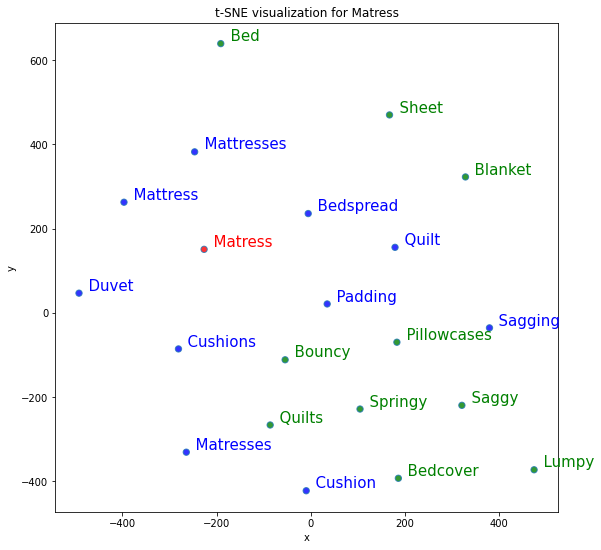

In [16]:
tsnescatterplot(model, "matress", [t[0] for t in model.wv.most_similar(positive=["matress"], topn=20)][10:])